In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('data/train_dataset_new.csv', sep=',')
data.head()

,id,ticket_id,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,edinyi,facepay,ordinator,prigorod,regular,school,social,student,worker,route_dur
0,1,40BD89EC85646EFB69E283F39C298E60,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
1,2,126727A96489CC976A8C08E5CEB00542,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0


In [4]:
data.columns

Index(['id', 'ticket_id', 'entrance_id', 'entrance_nm', 'station_id',
       'station_nm', 'line_id', 'line_nm', 'pass_dttm', 'time_to_under',
       'label', 'type_tk', 'pass_datetime', 'weekday', 'hour',
       'ticket_regular', '30 дней', '365 дней', '90 дней', 'aspirant',
       'assistent', 'druzhinnik', 'edinyi', 'facepay', 'ordinator', 'prigorod',
       'regular', 'school', 'social', 'student', 'worker', 'route_dur'],
      dtype='object')

In [5]:
data.label.value_counts()[:159]

3002    17272
6008    15541
1022    13758
5010    13122
7022    13080
        ...  
1013     2790
9025     2779
1017     2771
6024     2749
3014     2723
Name: label, Length: 159, dtype: int64

In [6]:
data.shape

(1091021, 32)

In [7]:
data = data.iloc[:50000]

In [8]:
columns_set = ['entrance_id', 'station_id','line_id', 
               'type_tk', 'weekday', 'hour',
               'ticket_regular', '30 дней', '365 дней', '90 дней', 'aspirant',
               'assistent', 'druzhinnik', 'edinyi', 'facepay', 'ordinator', 'prigorod',
               'regular', 'school', 'social', 'student', 'worker', 'route_dur']
# 'time_to_under',
# add forecast

X = data[columns_set]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### DecisionTreeClassifier

In [9]:
clf_tree = DecisionTreeClassifier()

In [10]:
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)

In [11]:
recall_score(y_test, y_pred, average='weighted')

0.06753333333333333

### XGBoost

In [12]:
import xgboost as xgb

In [13]:
encoder = LabelEncoder()
encoder.fit(data['label'])

LabelEncoder()

In [14]:
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

In [15]:
model_xgb = xgb.XGBClassifier(subsample=0.2, n_estimators=50)
model_xgb.fit(X_train, y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [16]:
y_pred_xgb = model_xgb.predict(X_test)

In [17]:
recall_score(y_test_enc, y_pred_xgb, average='weighted')

0.07106666666666667

In [18]:
# 0.11966666666666667
# 0.127

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

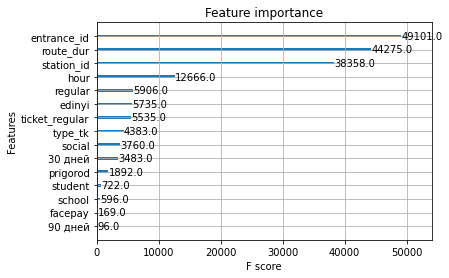

In [19]:
xgb.plot_importance(model_xgb)

### Catboost

In [20]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(logging_level='Silent')

In [21]:
cat.fit(X_train, y_train)

In [22]:
y_pred_cat = cat.predict(X_test)

In [23]:
recall_score(y_test, y_pred_cat, average='weighted')

c:\users\anastasia\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.07753333333333333

In [24]:
# 0.05948833227360686
# 0.06142316694381596

In [27]:
result = 0.5*0.5297960086437499 + 0.5*0.07753333333333333
result

0.3036646709885416